## PART 02. 데이터탐색과 데이터정제 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

## 1. 단변량 데이터 탐색

### 범주형 자료의 탐색

기본 정보는 pandas에서 **'데이터셋.info()'**로 수행

케이스수, 컬럼수 제시됨.

각 컬럼(변수)의 개수 및 자료 형태가 제시됨.

In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사실기준비/Ex_CEOSalary.csv', encoding = 'utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


기본적으로 pandas로 데이터를 불러온 후 info, head를 수행해 자료 특성과 구조를 살펴보는 것이 좋음.

In [3]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


기업의 매출(sales)과 수익(roe)이 CEO의 연봉(salary)에 미치는 영향관계를 파악하려는 데이터.

독립변수(특성치) : sales, roe

종속변수(레이블) : salary

'industry'는 범주형 변수(categorical variable)

각 숫자는 산업유형을 의미

각 범주의 수를 파악하기 위해 '데이터셋명.value_counts()' 함수를 이용하여 industry 변수의 범주별 빈도를 파악.

In [4]:
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

#### replace 함수 사용
**데이터셋[컬럼].replace(value, 바꾸는 value)**


---



산업의 각 범주에 라벨(label)을 부여하면 좀 더 이해하기 쉬울 듯.

replace 함수로 산업의 의미 부여.

숫자를 문자로 변경하기.

In [5]:
data['industry'] = data['industry'].replace([1,2,3,4], ['Service', 'IT', 'Finance', 'Others'])

data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

#### % matplotlib 패키지

% matplotlib inline : % matplotlib이라는 패키지를 불러와 결과를 코드 안에 수행(inline)함.

'value_counts()' 뒤에 '.plot'을 붙여 그래프를 작성할 수 있음.

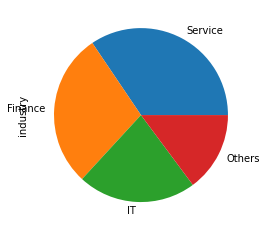

In [6]:
%matplotlib inline

data['industry'].value_counts().plot(kind='pie')

막대 도표로 표현하기

kind 옵션을 bar로 변경.

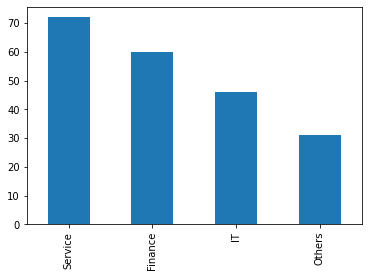

In [7]:
data['industry'].value_counts().plot(kind="bar")

### 연속형 자료 탐색

범주형이 아닌 **숫자형(연속형) 자료(numeric/continuos variable)**는 **describe()** 함수를 이용하여 **기술통계량(descriptive statistics)**을 확인할 수 있음.

**'데이터셋명.describe()'**를 수행하면 모든 변수별 요약 통계량이 일목요연하게 제시됨.

In [8]:
data.describe()

# roe의 평균과 중위수는 각각 17.2, 15.5로 유사한 반면, salary와 sales는 차이가 매우 큼.
# 해당 두 변수에서 이상치가 다수 존재할 것으로 예상함.

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


특히 평균(mean)과 중위수(50%)의 차이가 크지 않은지 확인하기.

평균(mean)과 중위수(50%, median)가 일치할수록 이상치가 적은 데이터를 의미함.

평균과 중위수의 차이가 크면 큰 값이든 작은 값이든 이상치가 있어 주의해야 함.


---



자료의 분포를 좀 더 구체적으로 보려면 추가적으로 **왜도(skewness)**와 첨도**(kurtosis)**를 살펴 정규분포와 유사한지를 검토하는 것이 좋음.

**'데이터셋명.skew()'**와 **'데이터셋명.kurtosis()'**로 확인할 수 있음.

#### 왜도



*   왜도는 0일 경우 정규분포와 일치하여 좌우가 대칭된 형태
*   2보다 크면 어느 한쪽으로 치우쳐져 있다는 것을 의미.
*   왜도가 음(-)수면 오른쪽에 자료가 더 많고 이상치는 작은 값들이 있음.
*   양(+)수면 반대로 왼쪽에 자료가 더 많고 이상치는 큰 값이 많다고 볼 수 있음.

In [9]:
data.skew()

# salary와 sales의 왜도 모두 2보다 크고 양(+)의 값으로, 매우 큰 이상치들로 인해 우측꼬리분포 형태를 보일 것으로 판단


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

#### 첨도



*   첨도가 0이면 정규분포의 높이와 동일

*   값이 클수록 중심에 자료가 많이 몰려 있다는 의미



In [10]:
data.kurtosis()

# salary와 sales 각각 59,33으로 매우 높음.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

#### 판다스의 기술통계량 주요 함수
**데이터셋.함수명()**



*   count() : NA 값을 제외한 값의 수를 반환

*   describe() : 시리즈 혹은 데이터프레임의 각 열에 대한 기술 통계

*   min(), max() : 최소, 최대값

*   sum() : 합

*   mean() : 평균

*   median() : 중위값

*   var() : 표본 분산

*   std() : 표본 정규분산



---



*   argmin(), argmax() : 최소, 최대값을 갖고 있는 색인 위치 반환

*   idxmin(), idxmanx() : 최소, 최대값 갖고 있는 색인의 값 반환

*   quantile() : 0부터 1까지의 분위수 계산

*   mad() : 평균값에서 절대 평균편차

*   skew() : 표본 비대칭도

*   kurt() : 표본 첨도

*   cumsum() : 누적 합

*   cummin(), cummax() : 누적 최소값, 누적 최대값

*   cumprod() : 누적 곱

*   diff() : 1차 산술차(시계열 데이터 사용시 유용)

*   pct_change() : 퍼센트 변화율 계산

*   corr : 데이터프레임의 모든 변수 간 상관관계 계산하여 반환

*   cov : 데이터프레임의 모든 변수 간 공분산을 계산하여 반환



연속형 자료의 형태를 가장 확실하게 확인할 수 있는 방법은 각 변수의 분포를 히스토그램(histogram)으로 직접 확인해보는 것.

판다스에서 기본적으로 도표와 그래프는 matplotlib 패키지의 pyplot을 이용함.

바로 '데이터셋.hist()'라고 해도 히스토그램은 제시됨.

bins는 구간너비, figsize는 도표 크기를 지정한 옵션.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a41e03d10>,
      dtype=object)

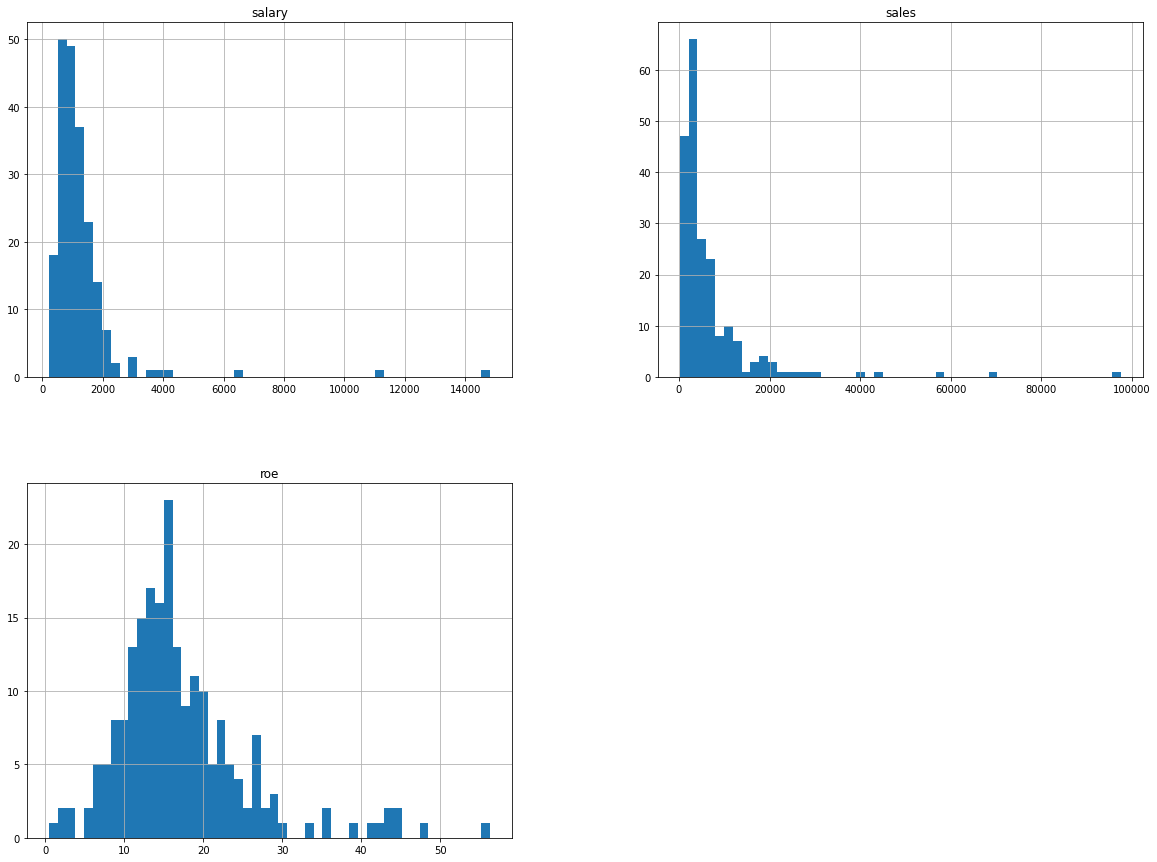

In [11]:
import matplotlib.pyplot as plt

data.hist(bins = 50, figsize = (20,15))

특정 한 변수만 파악하기

**데이터셋[변수명].hist()**

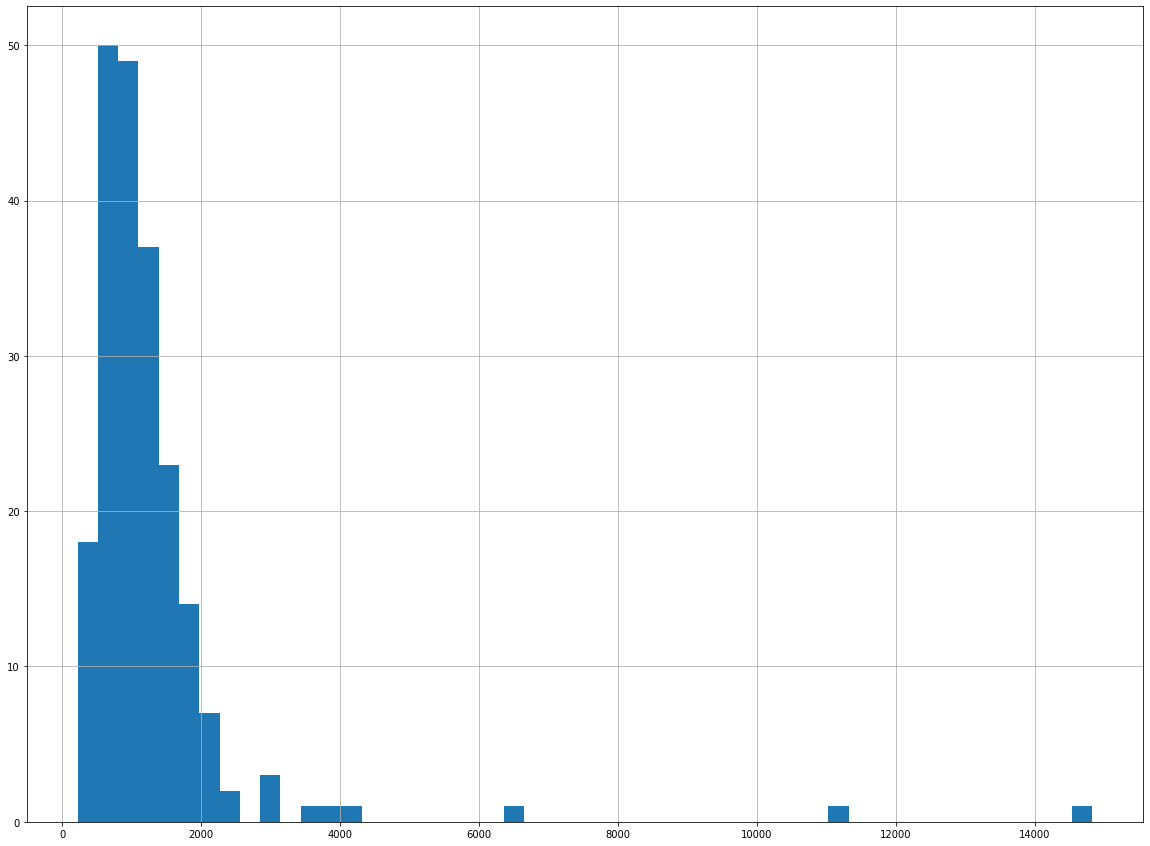

In [12]:
data['salary'].hist(bins = 50, figsize = (20,15))

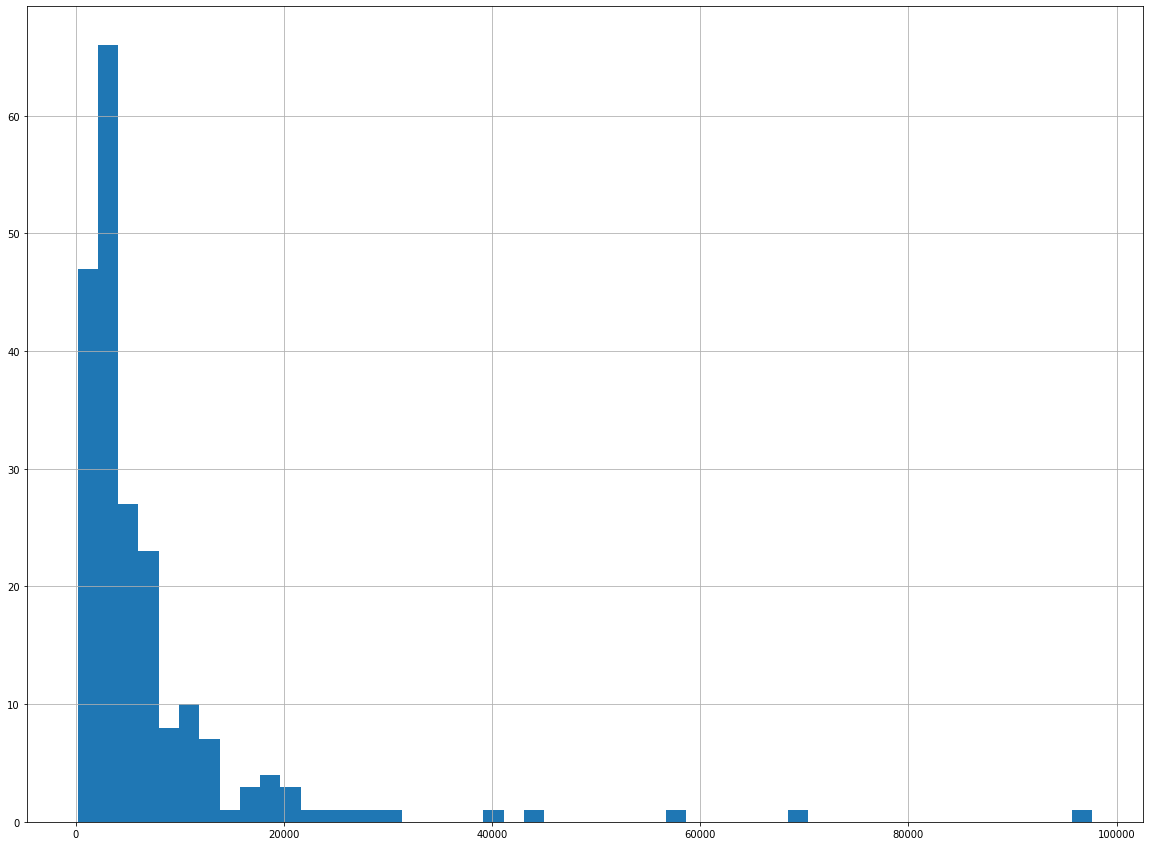

In [13]:
data['sales'].hist(bins = 50, figsize = (20,15))

#### 결과

기술통계, 왜도와 첨도, 히스토그램을 전반적으로 살펴본 결과, salary와 sales 모두 몇몇 큰 이상치(outlier)로 인해 문제가 발생함.

#### 이상치 문제 해결

1. 제거(delete) : 일부 큰 값 또는 작은 값을 제거하여 정규성에 근사하게 만들어야 함.

2. 변환(transform) : 이상치의 단위가 줄어들도록 log변환 또는 제곱근 변환을 하여 문제 해결.

## 2. 이변량 데이터 탐색

독립변수와 종속변수 간에 예측(회귀) 문제인 지도학습인 경우, 선형성 여부를 판단하는 과정이 반드시 필요함.

pandas에서는 corr() 함수로 두 변수 간의 상관계수를 파악할 수 있음.

**'데이터셋명.corr()'**로 수행

In [14]:

data.corr()

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


결과는 독립변수인 sales, roe와 종속변수인 salary간의 상관계수를 중심으로 파악하는 것이 좋음.



*   sales와 salary의 상관계수 : 0.120
*   roe와 salary는 0.115
** 매우 낮은 수준

이 결과를 보면 salary는 두 변수와 큰 상관 없는 것처럼 보이지만, 현재 이상치가 있는 데이터의 결과.



---



corr() 함수는 method를 pearson, spearman, kendall로 지정 가능.
디폴트는 pearson

In [15]:
data.corr(method = "pearson")

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [16]:
data.corr(method = "spearman")

,salary,sales,roe
salary,1.000000,0.528016,0.205984
sales,0.528016,1.000000,-0.170548
roe,0.205984,-0.170548,1.000000


In [17]:
data.corr(method = "kendall")

,salary,sales,roe
salary,1.000000,0.363921,0.143672
sales,0.363921,1.000000,-0.123844
roe,0.143672,-0.123844,1.000000


두 연속형 변수 간의 상관은 상관계수 외에 산점도(scatter plot)을 직접 확인하는 것이 좋음.

matplotlib.pyplot의 scatter 함수에서 X축 변수와 Y축 변수를 각각 설정하면 산점도를 얻을 수 있음.



---

#### plt.scatter(X, Y)

sales와 salary 간의 삼점도는 plt.scatter(X,Y)로 설정 가능.
X는  data['sales']
Y는 data['salary']



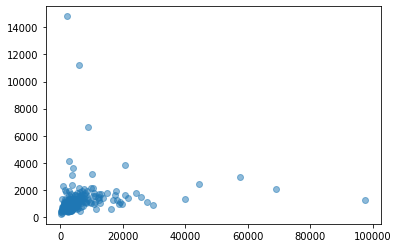

In [18]:
import matplotlib.pyplot as plt
plt.scatter(data['sales'], data['salary'], alpha = 0.5)
plt.show()

# sales와 salary 모두 큰 이상치 몇 개로 인해 관계가 왜곡되고 있는 것을 확인할 수 있음.

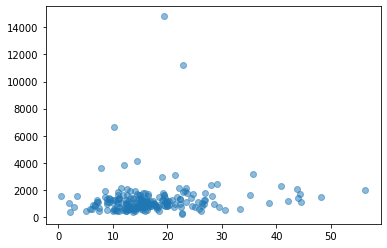

In [19]:
plt.scatter(data['roe'], data['salary'], alpha = 0.5)
plt.show()
# 이상치로 인해 대부분의 데이터가 아래에 위치하고 있음.

#### groupby 함수

산업 범주별로 **종속변수**인 salary의 **평균 및 기술통계량**을 파악하고자 한다면,

**pandas의 groupby** 함수를 이용.

* '데이터셋.groupby('컬럼명')[['컬럼명']].describe()

In [20]:
data.groupby('industry')[['salary']].describe()

# Finance의 salary가 1,722로 가장 높음.
# Others(기타) 산업은 627로 가장 낮은 것을 확인할 수 있음.

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
Finance    60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
IT         46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
Others     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
Service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                   
              max  
industry           
Finance   14822.0  
IT         6640.0  
Others     1100.0  
Service    3844.0

## 3. 이상치 처리

**이상치(outlier)**는 분석 전에 반드시 해결해야 함.

정상적인 범위 밖에 있는 너무 작은 값, 혹은 너무 큰 값은 단 1개라도 전체 분석 결과에 큰 영향을 줌.

이상치를 시각적으로 파악하기 위해 상자수염도표(box-whisker plot)를 주로 먼저 살펴봄.

상자도표는 **'데이터셋.boxplot(column = '변수명')'**을 설정하여 볼 수 있음.

**옵션 return_type**은 **'axes', 'dict', 'both'** 세 가지가 있음.

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a35d67f90>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f3a35d2fd50>, <matplotlib.lines.Line2D object at 0x7f3a35d392d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f3a35d39810>, <matplotlib.lines.Line2D object at 0x7f3a35d39d50>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f3a35d2f810>], 'medians': [<matplotlib.lines.Line2D object at 0x7f3a35d40310>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f3a35d40850>], 'means': []})

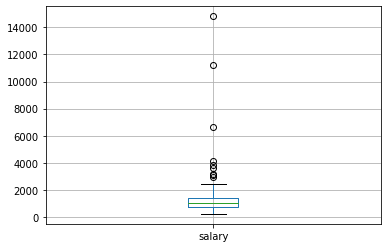

In [21]:
data.boxplot(column = 'salary', return_type= 'both')

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a35cd93d0>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f3a35caf950>, <matplotlib.lines.Line2D object at 0x7f3a35cafe90>], 'caps': [<matplotlib.lines.Line2D object at 0x7f3a35cb4410>, <matplotlib.lines.Line2D object at 0x7f3a35cb4950>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f3a35caf410>], 'medians': [<matplotlib.lines.Line2D object at 0x7f3a35cb4ed0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f3a35cbc450>], 'means': []})

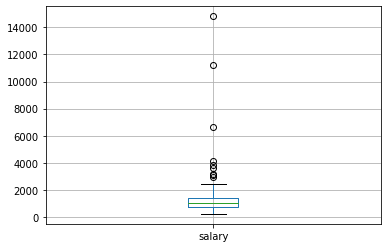

In [22]:
data.boxplot(column= 'salary', return_type= 'both')

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a35c6c450>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f3a35c2b4d0>, <matplotlib.lines.Line2D object at 0x7f3a35c2ba10>], 'caps': [<matplotlib.lines.Line2D object at 0x7f3a35c2bf50>, <matplotlib.lines.Line2D object at 0x7f3a35c324d0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f3a35c21f50>], 'medians': [<matplotlib.lines.Line2D object at 0x7f3a35c32a50>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f3a35c32f90>], 'means': []})

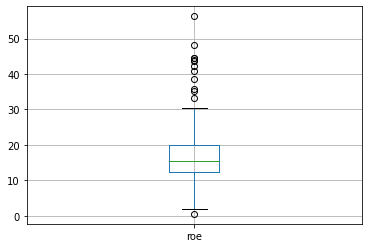

In [23]:
data.boxplot(column = 'roe', return_type= 'both')

### salary 변수 이상치 처리

이상치를 판단하는 명쾌한 기준은 없음. 분석자의 주관적인 판단에 따라서 제거하는 것이 일반적.

여기서는 IQR(Inter-Quartile Ranger) 기준으로 진행

필요한 부분

*   1사분위수(Q1)
*   3사분위수(Q3)
*   사분위편차(Q3-Q1)



In [24]:
Q1_salary = data['salary'].quantile(q = 0.25)
Q3_salary = data['salary'].quantile(q = 0.75)
IQR_salary = Q3_salary-Q1_salary
IQR_salary

671.0

IQR의 1.5배(IQR*1.5)보다 큰 값과 작은 값을 제거

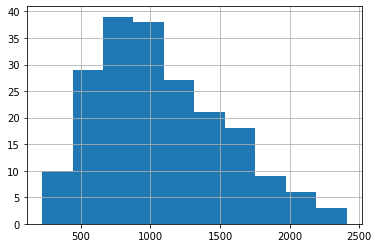

In [25]:
data_IQR = data[(data['salary'] < Q3_salary + IQR_salary*1.5) & (data['salary'] > Q1_salary-IQR_salary*1.5)]
data_IQR['salary'].hist()

# 이상치가 제거되어 정규분포와 비슷한 형태를 보이게 됨.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a35bcdad0>,
      dtype=object)

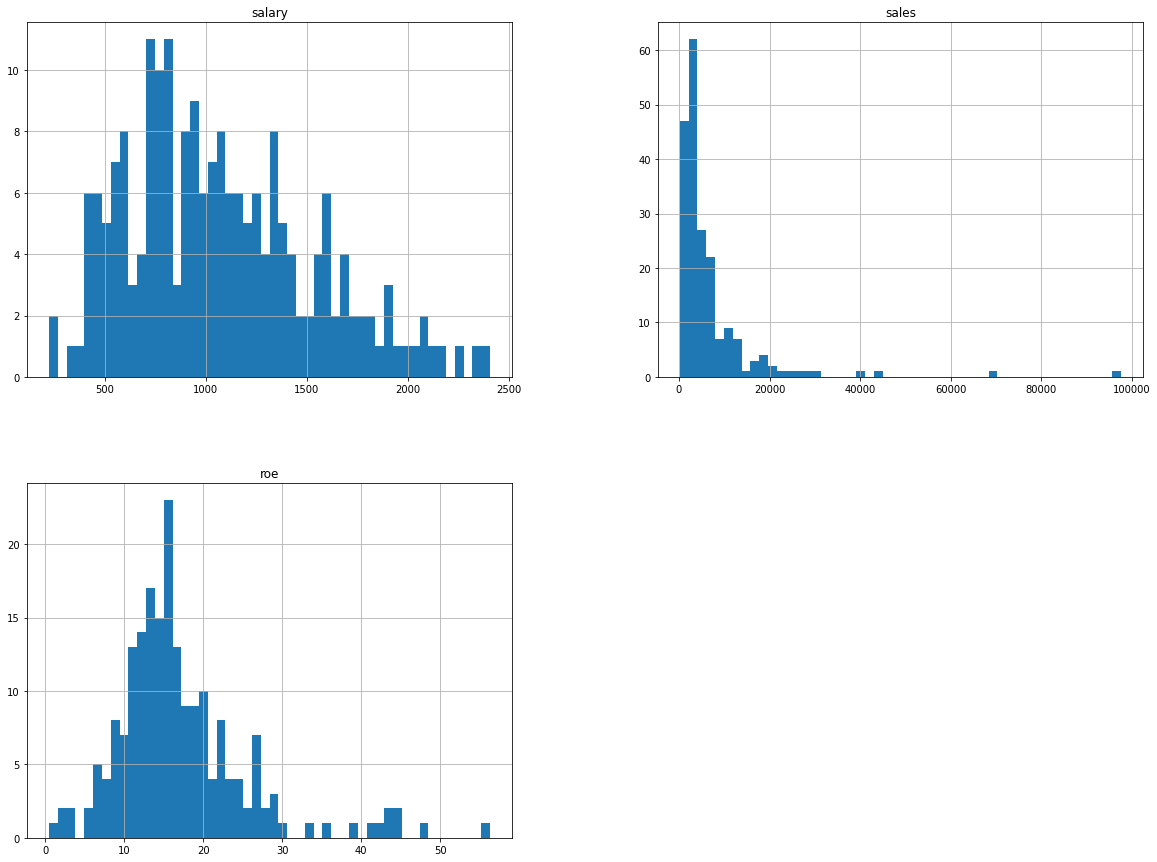

In [26]:
data_IQR.hist(bins = 50, figsize = (20,15))

# salary 컬럼에서 IQR 기준으로 이상치 제거한 후 모든 컬럼들을 히스토그램으로 탐색.
# roe도 덩달아 괜찮아졌지만 아직 이상치가 존재하므로 제거해줘야 함.

In [27]:
data_IQR.corr()

# salary와 sales, salary와 roe 간의 상관계수 높아짐.
# 이상치로 인한 왜곡 관계가 다소 해결된 결과

,salary,sales,roe
salary,1.000000,0.335446,0.289704
sales,0.335446,1.000000,-0.065034
roe,0.289704,-0.065034,1.000000


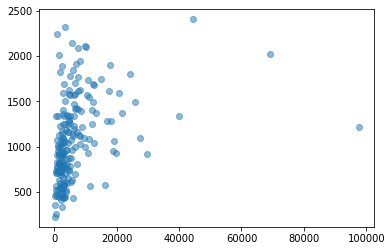

In [28]:
import matplotlib.pyplot as plt
plt.scatter(data_IQR['sales'], data_IQR['salary'], alpha = 0.5)
plt.show()

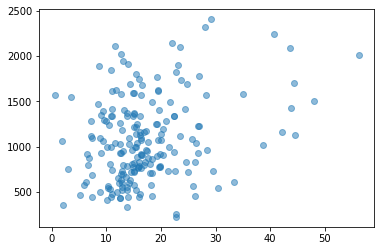

In [29]:
plt.scatter(data_IQR['roe'], data_IQR['salary'], alpha=0.5)
plt.show()

### sales 변수 이상치 처리

In [30]:
Q1_sales = data['sales'].quantile(q = 0.25)
Q3_sales = data['sales'].quantile(q = 0.75)
IQR_sales = Q3_sales - Q1_sales
IQR_sales

4966.6999511718695

IQR_sales와 IQR_salary 모두 제거한 후 data_IQR 데이터셋에 할당.

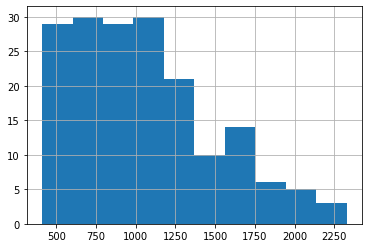

In [31]:
data_IQR = data[(data['sales'] < Q3_sales + IQR_sales*1.5) & (data['sales'] > Q1_sales - IQR_sales*1.5) & 
                (data['salary'] < Q3_salary + IQR_salary*1.5) & (data['salary'] > Q3_salary - IQR_salary*1.5)]
data_IQR['salary'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a357bc4d0>,
      dtype=object)

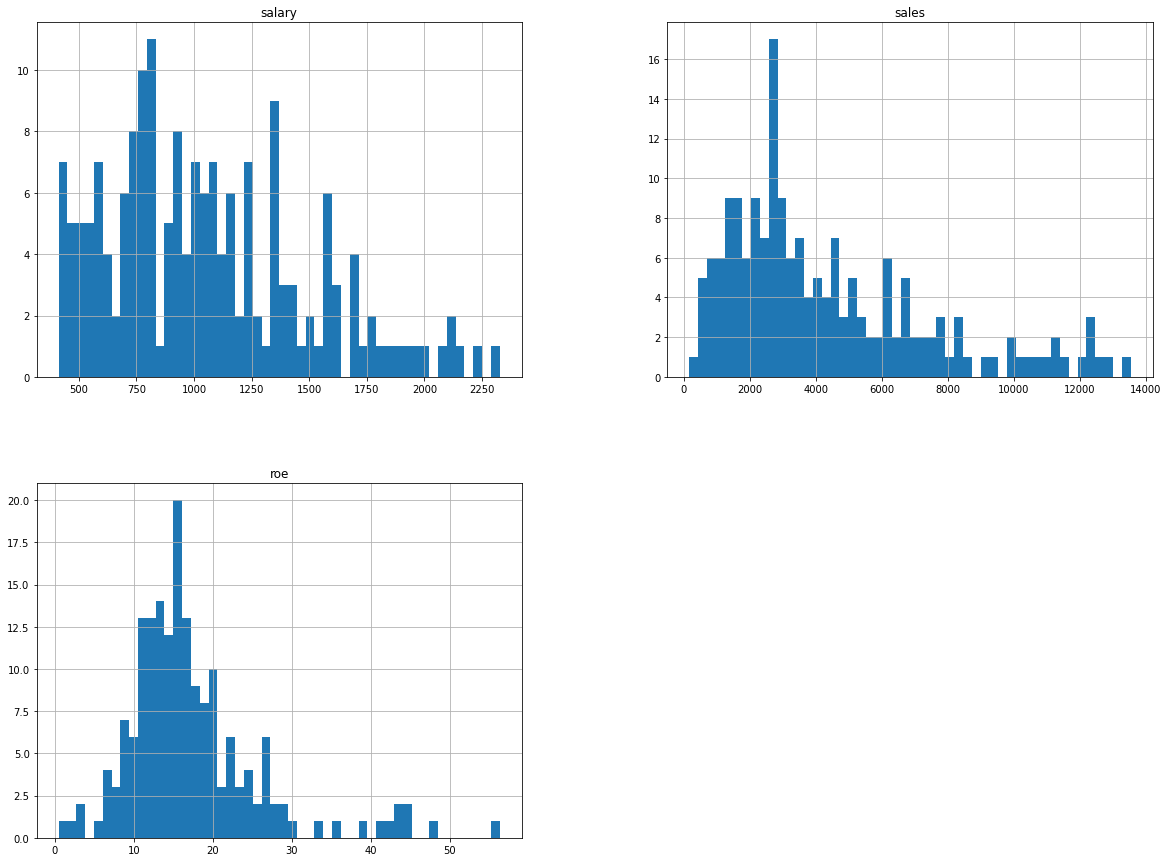

In [32]:
data_IQR.hist(bins = 50, figsize = (20,15))

# 세 변수 모두 이상치에 의한 왜곡 정도가 크게 개선됨.

In [33]:
data_IQR.corr()
# 상관계수가 다소 높아진 것을 알 수 있음.

,salary,sales,roe
salary,1.000000,0.450276,0.305983
sales,0.450276,1.000000,-0.083506
roe,0.305983,-0.083506,1.000000


## 4. 변수변환

**이상치를 제거하지 않은 원데이터를 변환**하는 과정을 통해 이상치 문제 해결하기.

1. **raw data**에 **log를 취하는 방법(log 변환)**
2. **제곱근을  취하는 방법(제곱근 변환)**

두 방법 모두 **데이터의 단위를 크게 줄여서 큰 값의 영향을 없애는 것**임. 

장점 : 쉽게 이상치를 해결
단점 : 단위가 변하기 때문에 결과의 해석이 어렵다

### 로그 변환

**np.log(데이터셋['변수명'])**

1. numpy 불러오기.

2. np.log(데이터셋['변수명'])


In [34]:
import numpy as np
data['log_salary'] = np.log(data['salary'])
data['log_sales'] = np.log(data['sales'])
data['log_roe'] = np.log(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe
0,1095,27595.000000,14.1,Service,6.998510,10.225390,2.646175
1,1001,9958.000000,10.9,Service,6.908755,9.206132,2.388763
2,1122,6125.899902,23.5,Service,7.022868,8.720281,3.157000
3,578,16246.000000,5.9,Service,6.359574,9.695602,1.774952
4,1368,21783.199219,13.8,Service,7.221105,9.988894,2.624669


raw data와 log 변환 데이터를 히스토그램으로 파악해보면 이상치의 값이 중앙으로 이동한 효과를 확인할 수 있음.

정규분포와 비슷

간단한 방법으로 바로 이상치의 영향을 제거 가능.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a3541aed0>,
      dtype=object)

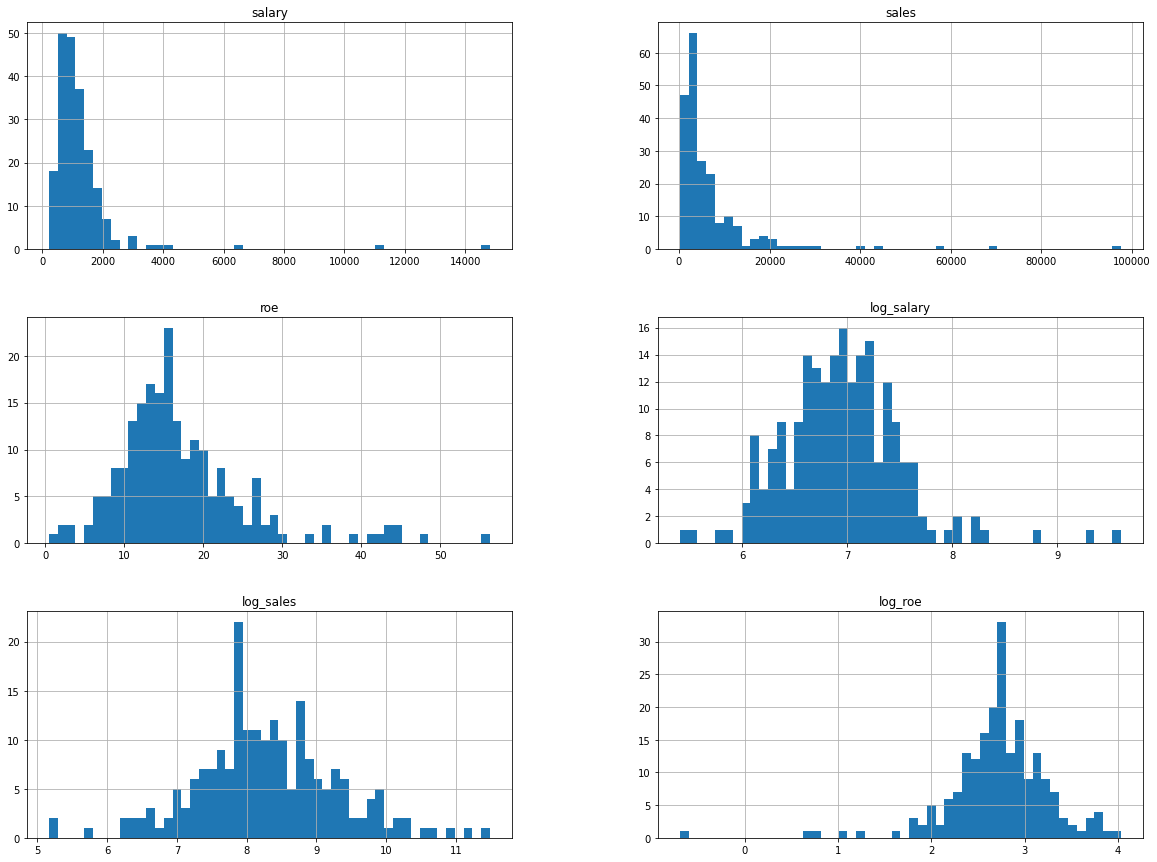

In [35]:
data.hist(bins = 50, figsize = (20,15))

In [36]:
data.corr()

# 로그 변환 전 상관관계
# 0.12, 0.11 등 낮은 상관계수

# 로그 변환 후 상관계수
# 0.46, 0.16

,salary,sales,roe,log_salary,log_sales,log_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000


### 제곱근 변환

**np.sqrt(데이터셋명['변수명'])**

In [37]:
data['sqrt_salary'] = np.sqrt(data['salary'])
data['sqrt_sales'] = np.sqrt(data['sales'])
data['sqrt_roe'] = np.sqrt(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
0,1095,27595.000000,14.1,Service,6.998510,10.225390,2.646175,33.090784,166.117428,3.754997
1,1001,9958.000000,10.9,Service,6.908755,9.206132,2.388763,31.638584,99.789779,3.301515
2,1122,6125.899902,23.5,Service,7.022868,8.720281,3.157000,33.496268,78.268128,4.847680
3,578,16246.000000,5.9,Service,6.359574,9.695602,1.774952,24.041631,127.459798,2.428992
4,1368,21783.199219,13.8,Service,7.221105,9.988894,2.624669,36.986484,147.591325,3.714835


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a34f29150>,
      dtype=object)

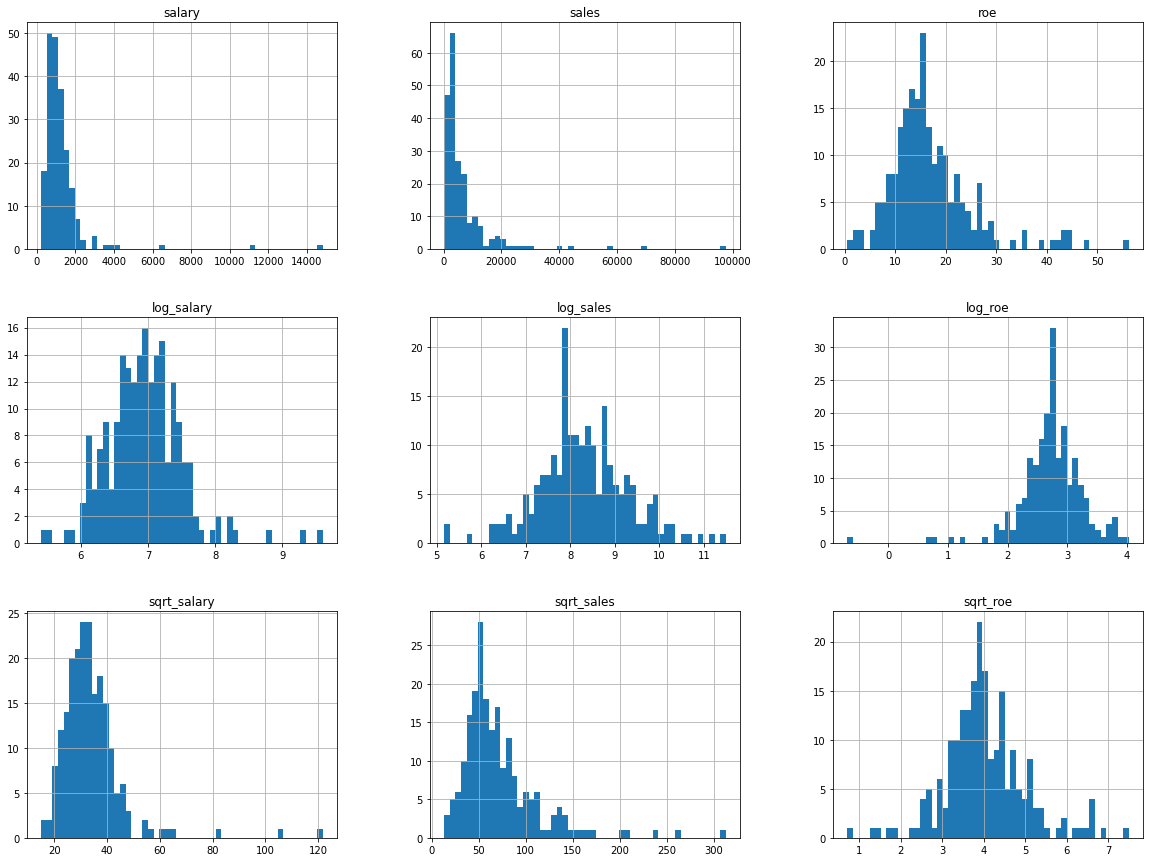

In [38]:
data.hist(bins=50, figsize = (20,15))

# 정규분포와 비슷해짐.

In [39]:
# 상관계수 확인
data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526,0.945732,0.164340,0.115219
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004,0.215716,0.936282,-0.050538
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419,0.172327,-0.087687,0.977012
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548,0.946014,0.386456,0.197914
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642,0.342422,0.920797,-0.129020
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000,0.139470,-0.083308,0.953806
sqrt_salary,0.945732,0.215716,0.172327,0.946014,0.342422,0.139470,1.000000,0.293173,0.165932
sqrt_sales,0.164340,0.936282,-0.087687,0.386456,0.920797,-0.083308,0.293173,1.000000,-0.089501
sqrt_roe,0.115219,-0.050538,0.977012,0.197914,-0.129020,0.953806,0.165932,-0.089501,1.000000


## 5. 결측치 처리

결측치(missing value) 확인하고 처리하기

In [40]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사실기준비/Ex_Missing.csv')
data

# salary 2개, sales 2개, roe에 1개의 결측값 확인
# 결측치는 'NaN'으로 표시됨.

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


### 결측치 확인

pandas의 isnull() 또는 notnull()

실무에서 많이 사용하지는 않음...

* isnull() : 결측이면 True, 결측이 아니면 False 값 반환


In [41]:
pd.isnull(data)
data.isnull()

,salary,sales,roe,industry
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,True,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


* notnull() : 결측이면 False, 결측이 아니면 True 값 반환

In [42]:
pd.notnull(data)
data.notnull()


,salary,sales,roe,industry
0,True,True,True,True
1,False,True,True,True
2,False,True,True,True
3,True,True,True,True
4,True,False,True,True
5,True,False,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,False,True


* 변수(컬럼) 별로 결측값 개수 확인하기
*   df.isnull().sum()

In [43]:
data.isnull().sum()

salary      2
sales       2
roe         1
industry    0
dtype: int64

* 특정 변수(컬럼)의 결측값 개수 확인 : df['컬럼'].isnull.sum()

In [44]:
data['salary'].isnull().sum()

2

* 변수(컬럼)별로 결측 아닌 값의 개수 확인 : df.notnull().sum()

In [45]:
data.notnull().sum()

salary       8
sales        8
roe          9
industry    10
dtype: int64

* 특정 변수(컬럼)결측 아닌 값의 개수 확인 : df['컬럼'].notnull().sum()

In [46]:
data['salary'].notnull().sum()

8

#### 행별 결측 확인 및 저장

가끔 결측 여부뿐만 아니라 결측치의 수를 새로운 변수로 저장이 필요한 경우가 있음

*  행(row) 단위로 결측값 개수 구하기 : df.isnull().sum(1)

In [47]:
data.isnull().sum(1)

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    0
8    0
9    1
dtype: int64

* 행(row) 단위로 결측값 개수 구해서 새 변수 생성하기

In [48]:
data['missing'] = data.isnull().sum(1)
data

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,NaN,9958.000000,10.900000,1,1
2,NaN,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,NaN,13.800000,1,1
5,1145.0,NaN,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,NaN,2,1


* 행(row) 단위로 실측값 개수 구하기 : df.notnull().sum(1)

In [49]:
del data['missing']

data['valid'] = data.notnull().sum(1)
data

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,NaN,9958.000000,10.900000,1,3
2,NaN,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,NaN,13.800000,1,3
5,1145.0,NaN,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,NaN,2,3


### 결측값 제거 : dropna()


결측치 제거 : **dropna()**

* 결측값이 있는 행 제거 : delete row with missing values
* 결측값이 있는 열 제거 : delete column with missing values
* 결측값이 있는 특정 행 또는 열 제거 : delete specific row or column with missing values

#### 결측값 있는 행(row/case) 제거

* 행(row) : 축(axis) 0
* **dropna(axis=0)**

In [50]:
data_del_row = data.dropna(axis=0)
data_del_row

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
3,578.0,16246.000000,5.900000,1,4
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4


#### 결측값 있는 열(column/variable) 제거

* 열(column) : 축(axis) 1
* dropna(axis=1)

In [51]:
data_del_col = data.dropna(axis=1)
data_del_col

,industry,valid
0,1,4
1,1,3
2,1,3
3,1,4
4,1,3
5,2,3
6,2,4
7,2,4
8,2,4
9,2,3


#### 결측값 있는 특정 행/열 제거

결측 있는 특정 행 제거
* **데이터셋[['컬럼']].dropna()**

In [52]:
data[['salary']].dropna()

,salary
0,1095.0
3,578.0
4,1368.0
5,1145.0
6,1078.0
7,1094.0
8,1237.0
9,833.0


In [53]:
# 4가지 변수에 결측치가 하나라도 있는 케이스를 제거하고 남겨보기.

data[['salary', 'sales', 'roe', 'industry']].dropna()

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
3,578.0,16246.000000,5.900000,1
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2


In [54]:
# 위 내용을 axis = 0으로 한 결과
# dropna()의 default는 axis = 0

data[['salary', 'sales', 'roe', 'industry']].dropna(axis = 0)

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
3,578.0,16246.000000,5.900000,1
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2


In [55]:
# 열(변수.컬럼) 기준으로 결측치가 있는 것을 모두 제거

data[['salary', 'sales', 'roe', 'industry']].dropna(axis=1)

,industry
0,1
1,1
2,1
3,1
4,1
5,2
6,2
7,2
8,2
9,2


### 결측값 대체

**'fillna()'**



*   결측값을 특정 값으로 대체 : replace missing values with scalar value

*   결측값을 변수별 평균으로 대체 : filling missing values with mean value per volumns
*   결측값을 다른 변수의 값으로 대체 : filling missing values with another columns' value
*   결측값을 그룹 평균 값으로 대체 : fill missing values by Group means



In [56]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사실기준비/Ex_Missing.csv')
data

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


#### 특정값으로 대체 : df.fillna(value/string)

In [57]:
data_0 = data.fillna(0)
data_0

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,0.0,9958.000000,10.900000,1
2,0.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,0.000000,13.800000,1
5,1145.0,0.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,0.000000,2


In [58]:
data_missing = data.fillna('missing')
data_missing

,salary,sales,roe,industry
0,1095.0,27595.0,14.1,1
1,missing,9958.0,10.9,1
2,missing,6125.899902,23.5,1
3,578.0,16246.0,5.9,1
4,1368.0,missing,13.8,1
5,1145.0,missing,20.0,2
6,1078.0,2266.699951,16.4,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.5,2
9,833.0,2830.0,missing,2




결측값을 앞 방향으로 채우기.

해당 변수의 앞의 값으로 대체.

* **fillna(method = 'ffill' or 'pad')**

In [59]:
data_ffill = data.fillna(method = 'ffill')
data_ffill

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1095.0,9958.000000,10.900000,1
2,1095.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,16246.000000,13.800000,1
5,1145.0,16246.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,10.500000,2


In [60]:
# method = 'pad'도 같은 결과

data_pad = data.fillna(method = 'pad')
data_pad

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1095.0,9958.000000,10.900000,1
2,1095.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,16246.000000,13.800000,1
5,1145.0,16246.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,10.500000,2


결측치를 다음 값으로 채우기

* **df.fillna(method = 'bfill' or 'backfill')**


In [61]:
data_bfill = data.fillna(method = 'bfill')
data_bfill

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,578.0,9958.000000,10.900000,1
2,578.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,2266.699951,13.800000,1
5,1145.0,2266.699951,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [62]:
# method = 'backfill'도 동일한 결과

data_backfill = data.fillna(method = 'backfill')
data_backfill

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,578.0,9958.000000,10.900000,1
2,578.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,2266.699951,13.800000,1
5,1145.0,2266.699951,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


#### 평균 대체

평균 : mean()

* df.fillna(df.mean())
* df.where(pd.notnull(df), df.mean(), axis = 'columns')

*numpy where*

*조건에 맞는 값 찾기*

*  *np.where(a > 3)*

*  *np.where(condition, T, F) 값 변경*

*조건에 맞는 인덱스 찾기*

*  *np.argmax, np.argmin, np.argsort*

In [63]:
data_mean = data.fillna(data.mean())
data.mean()

salary      1053.500000
sales       9069.825012
roe           14.600000
industry       1.500000
dtype: float64

In [64]:
# 중위수로 대체하고자 할 때

data_median = data.fillna(data.median())
data_median

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1094.5,9958.000000,10.900000,1
2,1094.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,5348.050049,13.800000,1
5,1145.0,5348.050049,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,14.100000,2


In [65]:
# 최대값 대체

data_max = data.fillna(data.max())
data_max

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1368.0,9958.000000,10.900000,1
2,1368.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,27595.000000,13.800000,1
5,1145.0,27595.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,23.500000,2


가끔 자기 변수가 아닌 다른 변수의 평균으로 대체하고자 할 때가 있음.

fillna() 옵션에 특정 변수의 평균을 설정.

예) salary 변수의 평균값으로 모든 결측값을 대체하려고 함.
    fillna() 안에 data.mean()['salary'] 또는 data['salary'].mean() 넣기

In [66]:
data_other_mean = data.fillna(data.mean()['salary'])
data_other_mean

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1053.5,9958.000000,10.900000,1
2,1053.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,1053.500000,13.800000,1
5,1145.0,1053.500000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,1053.500000,2


#### 다른 변수 값으로 대체

numpy의 where 함수 이용

자주 사용하진 않지만 원리 이해해 두기

In [67]:
import numpy as np
data2 = data.copy()
data2['sales_new'] = np.where(pd.notnull(data2['sales']) == True, data2['sales'], data2['salary'])
data2

,salary,sales,roe,industry,sales_new
0,1095.0,27595.000000,14.100000,1,27595.000000
1,NaN,9958.000000,10.900000,1,9958.000000
2,NaN,6125.899902,23.500000,1,6125.899902
3,578.0,16246.000000,5.900000,1,16246.000000
4,1368.0,NaN,13.800000,1,1368.000000
5,1145.0,NaN,20.000000,2,1145.000000
6,1078.0,2266.699951,16.400000,2,2266.699951
7,1094.0,2966.800049,16.299999,2,2966.800049
8,1237.0,4570.200195,10.500000,2,4570.200195
9,833.0,2830.000000,NaN,2,2830.000000


#### 집단 평균값으로 대체


전체 평균이 아닌 어떤 변수의 그룹(집단)별 평균으로 대체하는 것이 더 현실적일 때가 있음.


In [68]:
# 산업별 평균 확인

data.groupby('industry').mean()

,salary,sales,roe
industry,,,
1,1013.666667,14981.224976,13.64
2,1077.400000,3158.425049,15.80


*lambda 함수*

In [69]:
# lambda 함수로 평균 대체하는 함수 만들기

fill_mean_func = lambda g : g.fillna(g.mean())

*pandas apply 함수*

*  *데이터명.apply(적용할 함수, axis = 0 or 1)*

In [70]:
# lambda 함수를 apply()를 이용해 집단별 평균 적용.

data_group_mean = data.groupby('industry').apply(fill_mean_func)
data_group_mean

salary         sales        roe  industry
industry                                                  
1        0  1095.000000  27595.000000  14.100000         1
         1  1013.666667   9958.000000  10.900000         1
         2  1013.666667   6125.899902  23.500000         1
         3   578.000000  16246.000000   5.900000         1
         4  1368.000000  14981.224975  13.800000         1
2        5  1145.000000   3158.425049  20.000000         2
         6  1078.000000   2266.699951  16.400000         2
         7  1094.000000   2966.800049  16.299999         2
         8  1237.000000   4570.200195  10.500000         2
         9   833.000000   2830.000000  15.800000         2

In [71]:
# 집단별 평균이 아닌 분석자가 설정한 특정 값으로 대체하는 방법
# 산업의 1은 1000을, 2는 2000을 설정한다는 기준을 fill_values에 저장

fill_values = {1: 1000, 2: 2000}

In [72]:
# lambda 함수를 이용해 설정 기준을 함수로 만듦.

fill_func = lambda d: d.fillna(fill_values[d.name])

In [73]:
# 집단별 설정 함수를 apply()

data_group_value = data.groupby('industry').apply(fill_func)
data_group_value

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1000.0,9958.000000,10.900000,1
2,1000.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,1000.000000,13.800000,1
5,1145.0,2000.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,2000.000000,2


In [74]:
# 변수별로 다른 대체방법 한 번에 적용하기
# 결측값이 있을 때 salary는 보간법(interpolate), sales는 평균, roe는 'missing'이라는 문자로 대체

missing_fill_val = {'salary' : data.salary.interpolate(), 'sales' : data.sales.mean(), 'roe' : 'missing'}

print(missing_fill_val)

{'salary': 0    1095.000000
1     922.666667
2     750.333333
3     578.000000
4    1368.000000
5    1145.000000
6    1078.000000
7    1094.000000
8    1237.000000
9     833.000000
Name: salary, dtype: float64, 'sales': 9069.825012125, 'roe': 'missing'}


In [75]:
# 해당 기준을 fillna() 옵션에 반영

data_multi = data.fillna(missing_fill_val)
data_multi

,salary,sales,roe,industry
0,1095.000000,27595.000000,14.1,1
1,922.666667,9958.000000,10.9,1
2,750.333333,6125.899902,23.5,1
3,578.000000,16246.000000,5.9,1
4,1368.000000,9069.825012,13.8,1
5,1145.000000,9069.825012,20.0,2
6,1078.000000,2266.699951,16.4,2
7,1094.000000,2966.800049,16.299999,2
8,1237.000000,4570.200195,10.5,2
9,833.000000,2830.000000,missing,2


## 데이터 정제 실전 과제

주택가격 데이터에서 실제 존재하는 이상치를 찾아 정제

### 데이터 불러오기 및 탐색

In [76]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사실기준비/house_raw.csv')
data

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000
...,...,...,...,...,...,...
17909,33,2.6750,0.246622,3.428571,4.698413,22500
17910,39,2.3667,0.340771,1.876812,3.572464,17500
17911,19,2.1000,0.386107,2.987805,3.774390,14999
17912,16,1.6607,0.286275,2.236842,6.710526,14999


In [77]:
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [78]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000
mean,27.307022,3.664086,0.214309,3.007667,5.370672,188692.620130
std,11.297204,1.526694,0.055251,4.579534,2.332776,95318.621139
min,1.000000,0.499900,0.100000,0.692308,0.846154,14999.000000
25%,18.000000,2.526125,0.177544,2.467031,4.426115,114325.000000
50%,28.000000,3.447800,0.204256,2.853499,5.199222,170800.000000
75%,36.000000,4.583300,0.240476,3.318866,5.970848,242100.000000
max,51.000000,9.905500,1.000000,599.714286,132.533333,500000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a34681110>,
      dtype=object)

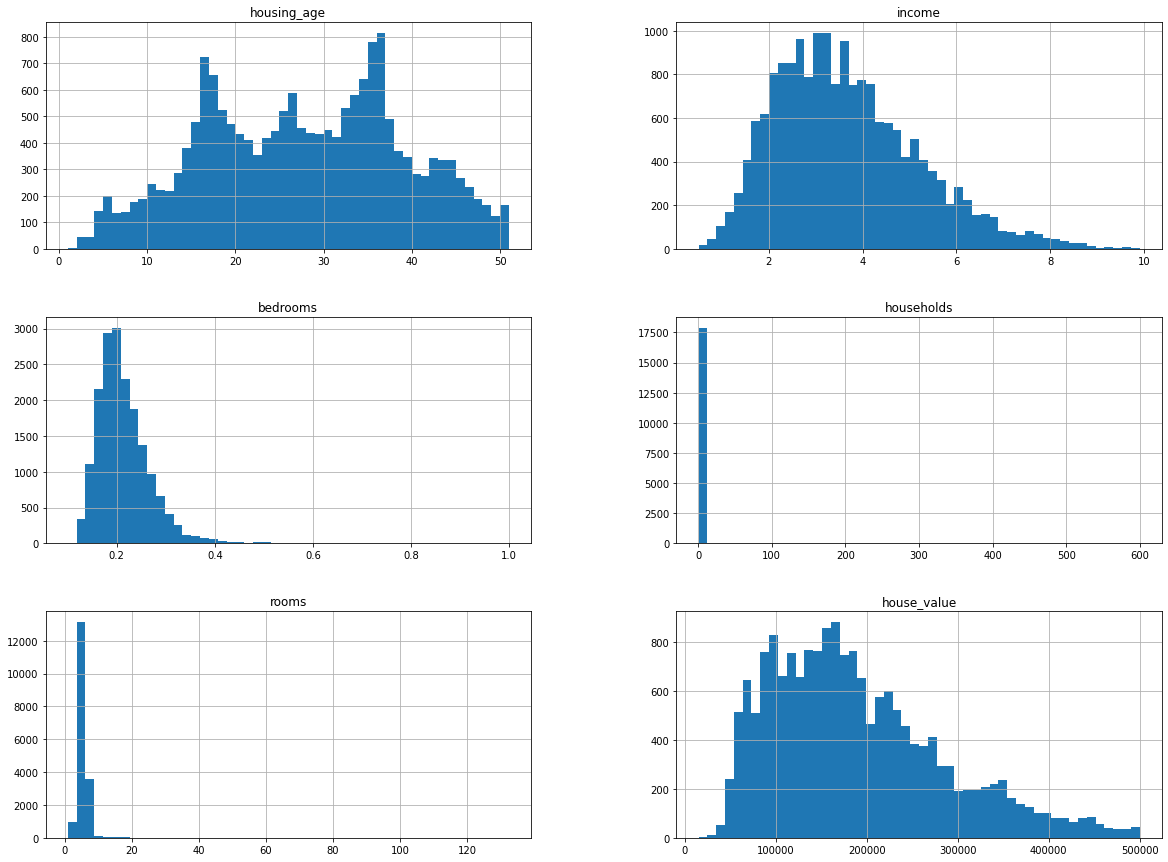

In [79]:
data.hist(bins = 50, figsize = (20,15))

### 선형 회귀 적용

주택가격(house_value)를 예측하는 것이 목적이므로 머신러닝 알고리즘 중 선형회귀분석 사용

In [80]:
# X에 0~4번 컬럼, y에 house_value 컬럼

X = data[data.columns[0:5]]
y = data[["house_value"]]

In [81]:
data.house_value
# = data['house_value']

0        500000
1        500000
2        500000
3        500000
4        500000
          ...  
17909     22500
17910     17500
17911     14999
17912     14999
17913     14999
Name: house_value, Length: 17914, dtype: int64

In [82]:
# data[data.house_value] 실행 안 됨.
# 실행 안 됨. data[data['house_value']]
data[['house_value']]

,house_value
0,500000
1,500000
2,500000
3,500000
4,500000
...,...
17909,22500
17910,17500
17911,14999
17912,14999


In [83]:
X

,housing_age,income,bedrooms,households,rooms
0,23,6.7770,0.141112,2.442244,8.103960
1,49,6.0199,0.160984,2.726688,5.752412
2,35,5.1155,0.249061,1.902676,3.888078
3,32,4.7109,0.231383,1.913669,4.508393
4,21,4.5625,0.255583,3.092664,4.667954
...,...,...,...,...,...
17909,33,2.6750,0.246622,3.428571,4.698413
17910,39,2.3667,0.340771,1.876812,3.572464
17911,19,2.1000,0.386107,2.987805,3.774390
17912,16,1.6607,0.286275,2.236842,6.710526


**train_test_split**

train 데이터와 test 데이터 구분을 위한 라이브러리를 불러옴.

**sklearn의 model_selection에서 train_test_split**

X와 y를 7:3으로 나눔.

**X_train, X_tes, y_train, y_test**에 할당

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**train 데이터 및 test 데이터의 특성치(독립변수)의 단위를 동일하게** 만드는 과정인 **정규화** 진행

** 여기서는 **Min-Max** 방법 적용

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

머신러닝 선형모델(LinearRegression) 적용

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

LinearRegression()

훈련데이터의 정확도(R-square : 설명력) : 55%(0.546)

** 좋은 결과

In [87]:
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.5463729131516732

test 데이터 정확도(R-square : 설명력) = -282%

** 정확도는 0~1 사이의 값이어야 함. 음수(-)가 나올 수 없음.

In [88]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

-2.822064801016153

### 데이터 정제를 위한 세부 검토

#### bedrooms (column)

bedrooms 변수의 분포를 확인해 본 결과 0.6 이상에서 매우 큰 값들이 존재하기 때문에 0.6 미만의 데이터만 따로 분포 보기.

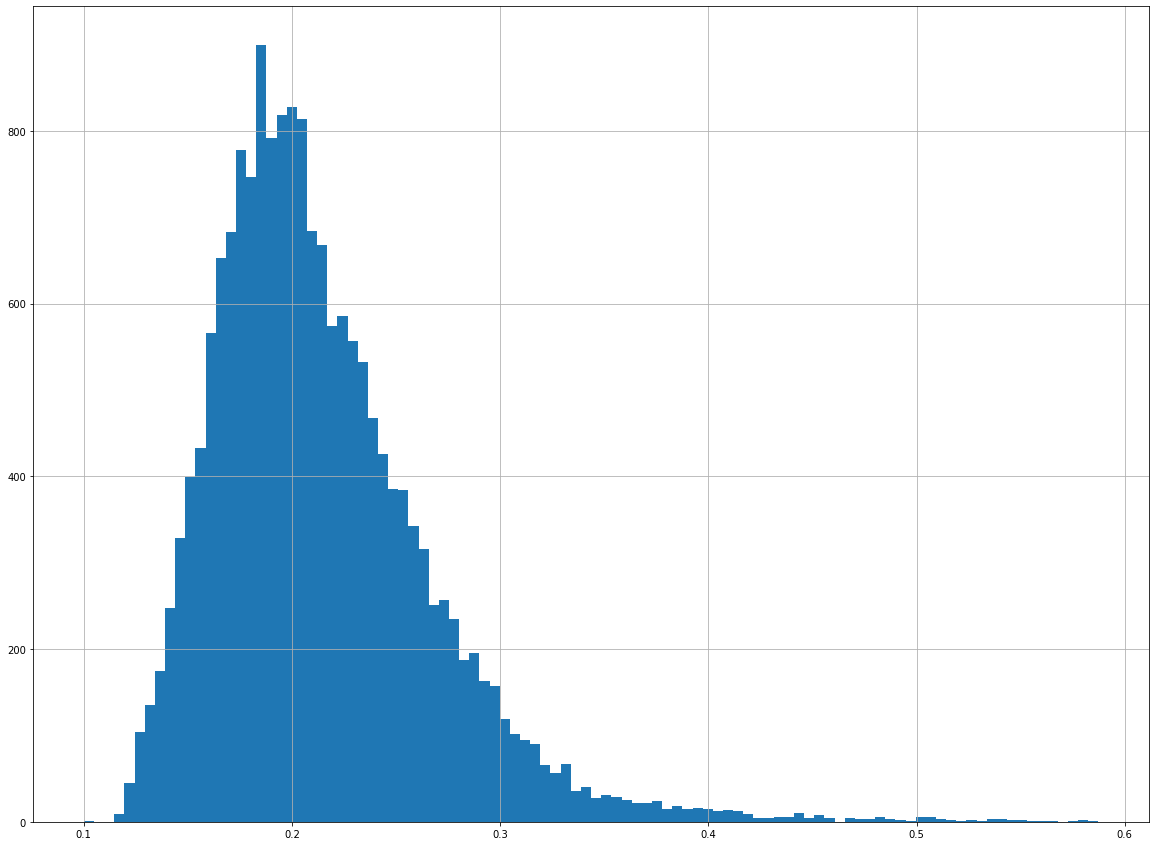

In [89]:
data_bedroom = data[data['bedrooms'] < 0.6]
data_bedroom['bedrooms'].hist(bins=100, figsize = (20,15))

약 14개의 데이터가 있음.

몇 개 되지 않는 데이터이므로 제거해도 전체 데이터에 영향이 없을 것임.

In [92]:
data_bedroom2 = data[data['bedrooms']>=0.6]
print(data_bedroom2['bedrooms'].value_counts())
data_bedroom2

1.000000    3
0.602489    1
0.635258    1
0.658869    1
0.613084    1
0.662539    1
0.625887    1
0.923077    1
0.700000    1
0.627338    1
0.686114    1
0.750000    1
Name: bedrooms, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
1732,43,1.3157,0.602489,2.133660,1.911826,333300
1911,25,1.7866,0.635258,3.566327,1.678571,325000
3162,26,1.4904,0.658869,3.750779,1.598131,275000
3165,12,1.2012,0.613084,3.271233,1.465753,275000
5446,24,1.8304,0.662539,3.973545,1.708995,225000
7674,45,1.4940,0.625887,3.673981,1.768025,187500
7677,20,1.0938,0.923077,1.739130,1.130435,187500
9658,46,2.8750,1.000000,1.846154,0.846154,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11810,37,2.7634,0.700000,4.524194,1.411290,137500


#### households (columns)

households 변수의 분포를 확인해 본 결과 10이상에서 매우 큰 값들이 존재함.

10미만의 데이터만 따로 분포보기.

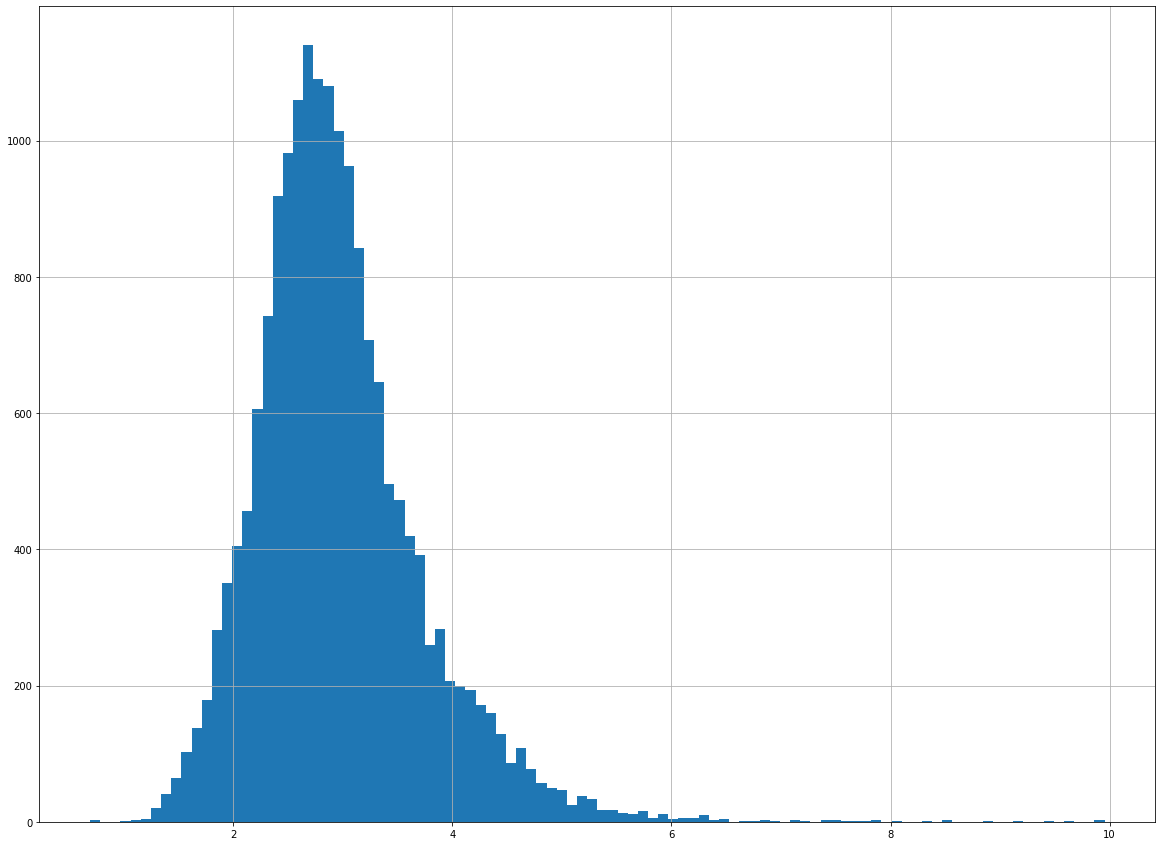

In [94]:
data_households = data[data['households']<10]
data_households['households'].hist(bins = 100, figsize = (20,15))

10보다 큰 데이터를 확인해보니, 약 22개의 데이터가 있음.

얼마 안 되는 데이터이므로 제거해도 전체 데이터에 영향이 없을 것임.

In [96]:
data_households2 = data[data['households']>=10]
print(data_households2['households'].value_counts())
data_households2

13.693487     1
12.234043     1
11.634146     1
19.312500     1
12.098940     1
12.296089     1
10.153846     1
10.980000     1
599.714286    1
12.895397     1
15.812155     1
12.130081     1
13.594828     1
18.500000     1
12.843750     1
18.444444     1
16.048780     1
63.750000     1
14.000000     1
51.400000     1
33.952941     1
16.937500     1
Name: households, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
2420,20,1.0298,0.338658,13.693487,2.398467,300000
5398,33,3.8750,0.218310,12.234043,3.021277,225000
8003,36,4.2578,0.212528,33.952941,5.258824,183300
9617,26,5.7485,0.167702,51.400000,5.366667,162500
9625,36,4.6250,0.142857,14.000000,24.500000,162500
9703,8,1.6250,0.125000,63.750000,7.600000,162500
9713,19,0.9573,0.338843,16.048780,2.951220,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11397,13,3.4107,0.218182,12.843750,5.156250,142500
11987,41,3.5769,0.222672,18.500000,4.940000,135700


#### rooms (column)

rooms 분포를 확인해 본 결과, 20 이상에서 매우 큰 값들이 존재함.

20 미만의 데이터만 따로 분포를 보면 아래와 같음.

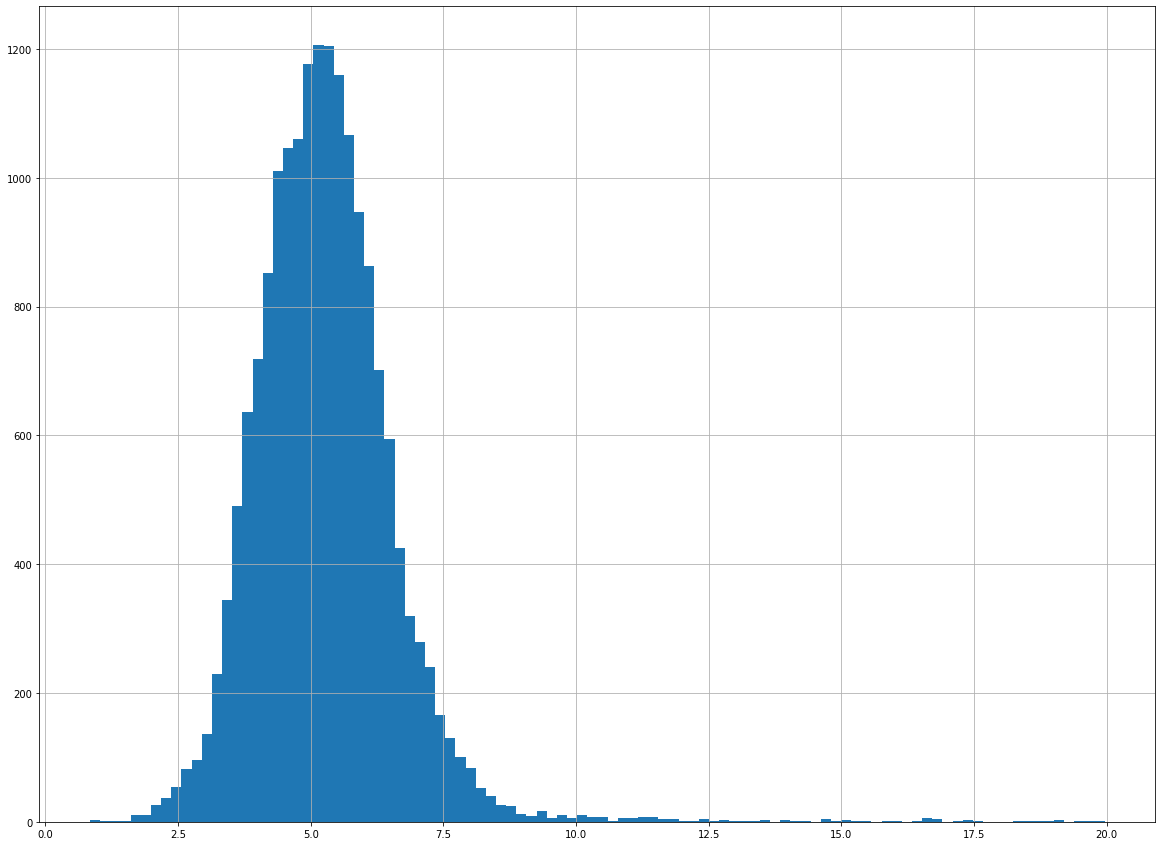

In [97]:
data_room = data[data['rooms']<20]
data_room['rooms'].hist(bins = 100, figsize = (20,15))

bedrooms에서 20보다 큰 데이터를 확인해보니 조금 많음.

전체 데이터 수가 많아서 제거해도 별 영향 없을 듯.

In [98]:
data_room2 = data[data['rooms']>=20]
print(data_room2['rooms'].value_counts())
data_room2

24.500000     2
61.812500     1
20.033333     1
36.060606     1
26.041096     1
             ..
26.511416     1
132.533333    1
24.900000     1
26.465969     1
31.777778     1
Name: rooms, Length: 63, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
324,19,4.0714,0.177958,2.333333,61.812500,437500
457,17,2.1719,0.172918,2.581818,28.600000,420000
1140,18,5.5456,0.146182,2.273585,36.075472,360000
2146,17,3.9722,0.172642,2.608355,20.900783,313400
2858,14,4.1016,0.175109,2.136364,20.939394,283300
...,...,...,...,...,...,...
16222,11,3.1250,0.235332,2.484848,47.515152,77500
16429,16,0.4999,0.277372,1.368421,21.631579,73500
16584,10,3.1250,0.250564,2.285714,21.095238,71300
16844,25,2.6250,0.255741,1.750000,59.875000,67500


### 정제 데이터셋 생성

임의적으로 정상데이터셋(new_data)의 기준을 침실 0.5 미만, 가족 수 7명 미만, 방 12개 미만인 데이터로 설정.

In [100]:
new_data = data[(data['bedrooms'] < 0.5) & (data['households']<7) & (data['rooms']<12)]

정상 데이터의 기술통계 확인.

평균과 중위수의 차이가 거의 없고 최대값도 지나치게 크지 않음.

In [101]:
new_data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a2d9bc550>,
      dtype=object)

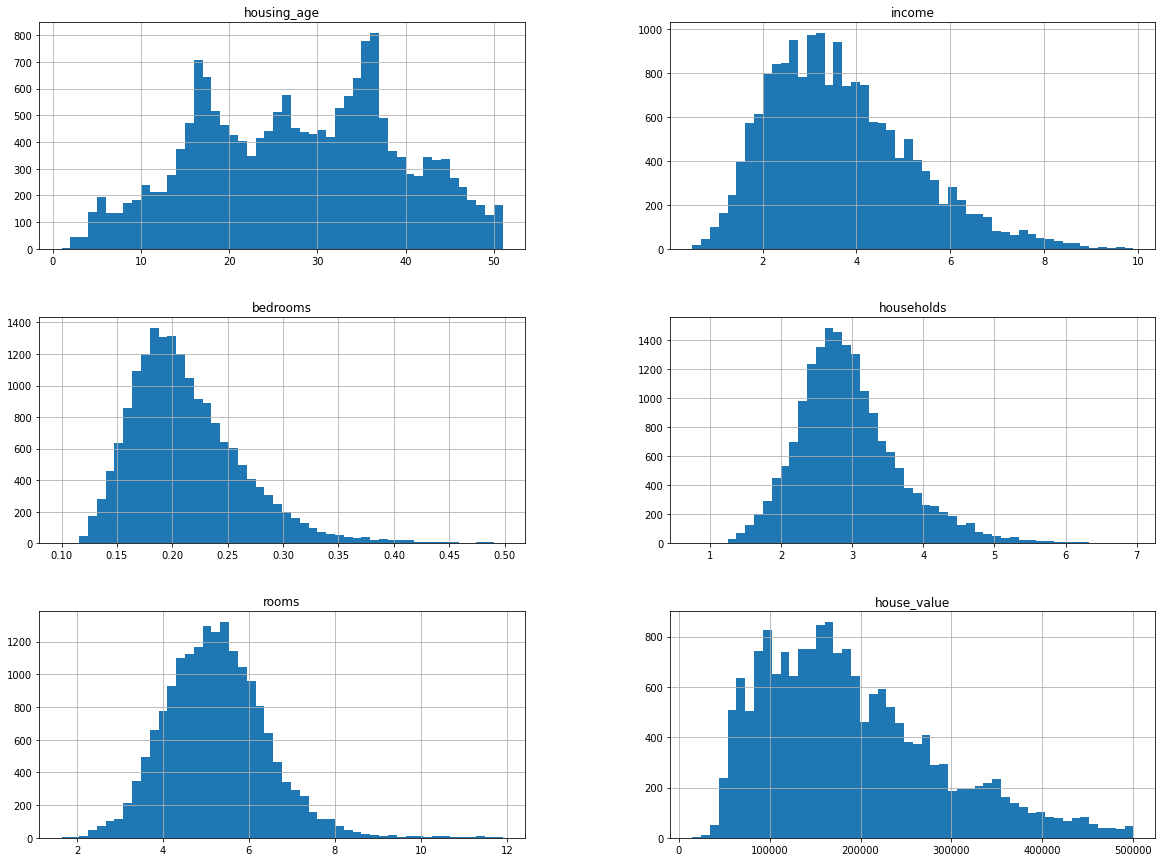

In [102]:
new_data.hist(bins = 50, figsize = (20,15))

### 선형회귀 적용 (정제 후 데이터)

In [104]:
# 특성데이터셋, 레이블 데이터셋 나누기
X = new_data[new_data.columns[0:5]]
y = new_data[["house_value"]]

# 학습용 데이터(train)와 테스트용 데이터(test) 구분을 위한 라이브러리 불러오기.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# 데이터 정규화(min-max)
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()

# 훈련데이터 및 테스트데이터 정규화
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

# 선형 모델 적용
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

# 훈련데이터의 정확도(R-square: 설명력) 확인
pred_train = model.predict(X_scaled_minmax_train)
print("훈련데이터 정확도", model.score(X_scaled_minmax_train, y_train))

# 테스트데이터의 정확도(R-square: 설명력) 확인
pred_test = model.predict(X_scaled_minmax_test)
print("테스트데이터 정확도", model.score(X_scaled_minmax_test, y_test))

훈련데이터 정확도 0.5706921210926263
테스트데이터 정확도 0.5826083517811865


분석 결과

train_data 정확도 : 57.1%

test_data 정확도 : 58.3%


매우 정상적인 좋은 결과

In [105]:
# csv 파일로 저장
new_data.to_csv("house_price.csv", index = False)